In [1]:
import numpy as np
import tarfile

In [2]:
import matplotlib.pyplot as plt
# %matplotlib notebook  
%matplotlib inline 

In [3]:
from astropy.io import fits

In [4]:
import scipy.interpolate as interp
from sys import platform

# Optical 2014



> From: Gregory Herczeg <gherczeg1@gmail.com>  
Date: Mon, Sep 21, 2015 at 6:38 PM  
Subject: AA Tau spectra  
To: Kevin Covey <kevin.covey@wwu.edu>  

> ...Most of this data was obtained at UH88, the spectra are from the automated reduction.  I've developed an alternative pipeline for the red, but not the blue, and without fluxcal.  So, for now, this is what we have.  We also have V-band from acquisition images, so it should be possible to test the fluxcal that way.

> The one ascii file is from DBSP in 2008 and should be good, with accurate fluxcal.

> ftp://ftp.mpe.mpg.de/people/gregoryh/forkc


From Kevin:

> While documenting everything for an 'observations' section, I was able to figure out the timing of the optical spectra that were observed in 2014.  It looks like spec_C14_346_066_001_17_R.fits and spec_C14_346_199_001_17_R.fits (and B.fits) are the closest optical spectra to our Dec. 12 NIR observations, and spec_C14_336_061_001_17_R.fits and spec_C14_336_162_001_17_R.fits (and B.fits, of course) are closest to our Dec. 2nd NIR spectra. 

Dec 12, 2014

spec_C14_346_066_001_17_R.fits and B.fits (later found to be bad in B, see below) 

spec_C14_346_199_001_17_R.fits and B.fits


Dec 2, 2014

spec_C14_336_061_001_17_R.fits and B.fits

spec_C14_336_162_001_17_R.fits and B.fits


In [5]:
# aatautar = tarfile.open('../../DATA/AATau.tar.gz')
# aatautar.list()
# aatautar.extractall(path="../../DATA/")
# aatautar.close()

## Dec 12, 2014

### R band first:

In [6]:
hdulist = fits.open('../..//DATA/AATau/Optical/spec_C14_346_066_001_17_R.fits')
# hdulist.info()
Rdata=hdulist[0].data
Rstart=hdulist[0].header['CRVAL1']
Rstep=hdulist[0].header['CDELT1']
Rwavelength_346_066=np.arange(Rstart,Rstart+Rstep*Rdata.size,Rstep)*1.0E-4 # microns
Rdata_346_066=hdulist[0].data
hdulist.close()

In [7]:
hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_346_199_001_17_R.fits')
# hdulist.info()
Rdata=hdulist[0].data
Rstart=hdulist[0].header['CRVAL1']
Rstep=hdulist[0].header['CDELT1']
Rwavelength_346_199=np.arange(Rstart,Rstart+Rstep*Rdata.size,Rstep)*1.0E-4 # MICRONS MICRONS MICRONS!
Rdata_346_199=hdulist[0].data
hdulist.close()

In [8]:
hdulist[0].header['FLXUNITS']

'erg/s/cm2/A'

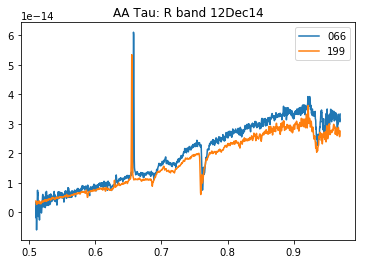

In [9]:
fig,ax=plt.subplots()
ax.plot(Rwavelength_346_066,Rdata_346_066,label="066")
ax.plot(Rwavelength_346_199,Rdata_346_199,label="199")
ax.set_title("AA Tau: R band 12Dec14")
ax.legend(loc="best")
plt.show()

In [10]:
np.min(Rwavelength_346_199),np.min(Rwavelength_346_066)  # They match

(0.51011300000000004, 0.51011300000000004)

Step 1 = Shift horizontally by matching Halpha peaks, scale vertically by matching the average flux in the flats from 0.78 to 0.92 microns

In [11]:
shift=np.argmax(Rdata_346_066)-np.argmax(Rdata_346_199)
shift

9

In [12]:
Rwavelength_346_066[9]-Rwavelength_346_066[0]

0.0026370000000002225

In [13]:
scale = np.average(Rdata_346_066[np.logical_and(Rwavelength_346_066 < 0.92, 
                                                Rwavelength_346_066 > 0.78)]) \
    / np.average(Rdata_346_199[np.logical_and(Rwavelength_346_199 < 0.92, 
                                              Rwavelength_346_199 > 0.78)]) 
scale    

1.1559718

The problem might be that the wavelengths aren't true without the horizontal shift, but we'll ignore that for now.

Use the 199 wavelengths: chop off the end and shift+scale the 066 onto it

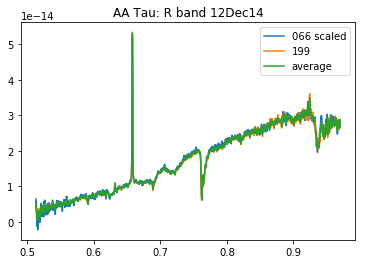

In [14]:
fig,ax=plt.subplots()
ax.plot(Rwavelength_346_066[shift:], Rdata_346_066[shift:]/scale,label="066 scaled")
ax.plot(Rwavelength_346_066[shift:], Rdata_346_199[:-shift],label="199")

Rdata_dec12=(Rdata_346_199[:-shift]+Rdata_346_066[shift:]/scale)/2.0
Rwavelength_dec12=Rwavelength_346_066[shift:]
ax.plot(Rwavelength_dec12,Rdata_dec12,label="average")
ax.set_title("AA Tau: R band 12Dec14")
ax.legend(loc="best")
plt.show()

### Next B:

In [15]:
hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_346_066_001_17_B.fits')
# hdulist.info()
Bdata=hdulist[0].data
Bstart=hdulist[0].header['CRVAL1']
Bstep=hdulist[0].header['CDELT1']
Bwavelength_346_066=np.arange(Bstart,Bstart+Bstep*Bdata.size,Bstep)*1.0E-4 # microns
Bdata_346_066=hdulist[0].data
hdulist.close()

hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_346_199_001_17_B.fits')
# hdulist.info()
Bdata=hdulist[0].data
Bstart=hdulist[0].header['CRVAL1']
Bstep=hdulist[0].header['CDELT1']
Bwavelength_346_199=np.arange(Bstart,Bstart+Bstep*Bdata.size,Bstep)*1.0E-4 # microns
Bdata_346_199=hdulist[0].data
hdulist.close()


Yikes!  346_066 is way too messy in B:

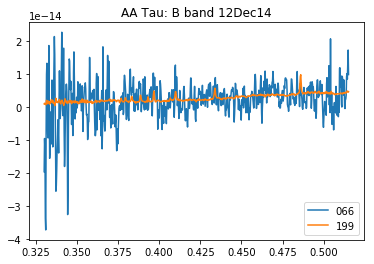

In [16]:
fig,ax=plt.subplots()
ax.plot(Bwavelength_346_066,Bdata_346_066,label="066")
ax.plot(Bwavelength_346_199,Bdata_346_199,label="199")
ax.set_title("AA Tau: B band 12Dec14")
ax.legend(loc="best")
plt.show()

Use only the 199 data (no shift, no scale):

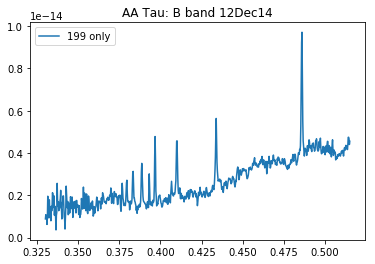

In [17]:
fig,ax=plt.subplots()
Bdata_dec12=Bdata_346_199
Bwavelength_dec12=Bwavelength_346_199
ax.plot(Bwavelength_dec12,Bdata_dec12,label="199 only")
ax.set_title("AA Tau: B band 12Dec14")
ax.legend(loc="best")
plt.show()

### Match R and B?  Bottom line is that they don't overlap that much

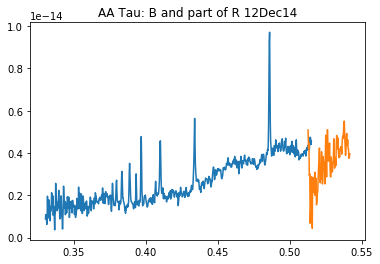

In [18]:
fig,ax=plt.subplots()
ax.plot(Bwavelength_dec12,Bdata_dec12)
ax.plot(Rwavelength_dec12[:100],Rdata_dec12[:100])
ax.set_title("AA Tau: B and part of R 12Dec14")
plt.show()

In [19]:
Bwavelength_dec12[-20:],Rwavelength_dec12[:20]

(array([ 0.51051 ,  0.510748,  0.510986,  0.511224,  0.511462,  0.5117  ,
         0.511938,  0.512176,  0.512414,  0.512652,  0.51289 ,  0.513128,
         0.513366,  0.513604,  0.513842,  0.51408 ,  0.514318,  0.514556,
         0.514794,  0.515032]),
 array([ 0.51275 ,  0.513043,  0.513336,  0.513629,  0.513922,  0.514215,
         0.514508,  0.514801,  0.515094,  0.515387,  0.51568 ,  0.515973,
         0.516266,  0.516559,  0.516852,  0.517145,  0.517438,  0.517731,
         0.518024,  0.518317]))

Conclusion: lop off points 0-7 of R band to "match"

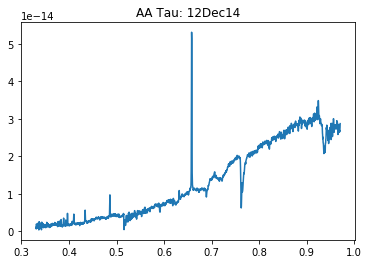

In [20]:
wavelength_dec12=np.append(Bwavelength_dec12,Rwavelength_dec12[8:])
data_dec12=np.append(Bdata_dec12,Rdata_dec12[8:])
fig,ax=plt.subplots()
ax.plot(wavelength_dec12,data_dec12)
ax.set_title("AA Tau: 12Dec14")
plt.show()

## Dec 2, 2014

### R and B, just as above:

In [21]:
hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_336_061_001_17_R.fits')
# hdulist.info()
Rdata=hdulist[0].data
Rstart=hdulist[0].header['CRVAL1']
Rstep=hdulist[0].header['CDELT1']
Rwavelength_336_061=np.arange(Rstart,Rstart+Rstep*Rdata.size,Rstep)*1.0E-4 # microns
Rdata_336_061=hdulist[0].data
hdulist.close()

hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_336_162_001_17_R.fits')
# hdulist.info()
Rdata=hdulist[0].data
Rstart=hdulist[0].header['CRVAL1']
Rstep=hdulist[0].header['CDELT1']
Rwavelength_336_162=np.arange(Rstart,Rstart+Rstep*Rdata.size,Rstep)*1.0E-4 # microns
Rdata_336_162=hdulist[0].data
hdulist.close()

shift=np.argmax(Rdata_336_061)-np.argmax(Rdata_336_162)

scale = np.average(Rdata_336_061[np.logical_and(Rwavelength_336_061 < 0.92, 
                                                Rwavelength_336_061 > 0.78)]) \
    / np.average(Rdata_336_162[np.logical_and(Rwavelength_336_162 < 0.92, 
                                              Rwavelength_336_162 > 0.78)]) 
shift,scale    


(4, 1.0501788)

In [22]:
hdulist[0].header['FLXUNITS']

'erg/s/cm2/A'

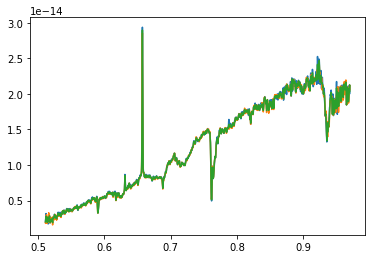

In [23]:
fig,ax=plt.subplots()
ax.plot(Rwavelength_336_061[shift:],Rdata_336_061[shift:])
ax.plot(Rwavelength_336_162[shift:],scale * Rdata_336_162[:-shift])

Rdata_dec02=(scale*Rdata_336_162[:-shift]+Rdata_336_061[shift:])/2.0
Rwavelength_dec02=Rwavelength_336_061[shift:]
ax.plot(Rwavelength_dec02,Rdata_dec02)

plt.show()

In [24]:
hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_336_061_001_17_B.fits')
# hdulist.info()
Bdata=hdulist[0].data
Bstart=hdulist[0].header['CRVAL1']
Bstep=hdulist[0].header['CDELT1']
Bwavelength_336_061=np.arange(Bstart,Bstart+Bstep*Bdata.size,Bstep)*1.0E-4 # microns
Bdata_336_061=hdulist[0].data
hdulist.close()

hdulist = fits.open('../../DATA/AATau/Optical/spec_C14_336_162_001_17_B.fits')
# hdulist.info()
Bdata=hdulist[0].data
Bstart=hdulist[0].header['CRVAL1']
Bstep=hdulist[0].header['CDELT1']
Bwavelength_336_162=np.arange(Bstart,Bstart+Bstep*Bdata.size,Bstep)*1.0E-4 # microns
Bdata_336_162=hdulist[0].data
hdulist.close()


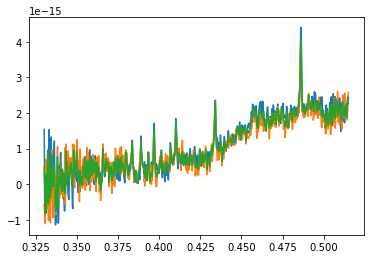

In [25]:
fig,ax=plt.subplots()
ax.plot(Bwavelength_336_061,Bdata_336_061)
ax.plot(Bwavelength_336_162,Bdata_336_162)

# These look good, so just average:

Bdata_dec02=(Bdata_336_162+Bdata_336_061)/2.0
Bwavelength_dec02=Bwavelength_336_061
ax.plot(Bwavelength_dec02,Bdata_dec02)
plt.show()

### Do R and B match?  Better than Dec 12!

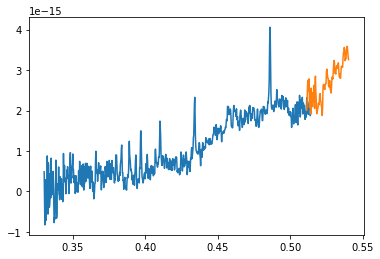

In [26]:
fig,ax=plt.subplots()
ax.plot(Bwavelength_dec02,Bdata_dec02)
ax.plot(Rwavelength_dec02[:100],Rdata_dec02[:100])
plt.show()

In [27]:
Bwavelength_dec02[-20:],Rwavelength_dec02[:20]

(array([ 0.51051 ,  0.510748,  0.510986,  0.511224,  0.511462,  0.5117  ,
         0.511938,  0.512176,  0.512414,  0.512652,  0.51289 ,  0.513128,
         0.513366,  0.513604,  0.513842,  0.51408 ,  0.514318,  0.514556,
         0.514794,  0.515032]),
 array([ 0.511285,  0.511578,  0.511871,  0.512164,  0.512457,  0.51275 ,
         0.513043,  0.513336,  0.513629,  0.513922,  0.514215,  0.514508,
         0.514801,  0.515094,  0.515387,  0.51568 ,  0.515973,  0.516266,
         0.516559,  0.516852]))

Conclusion: To match, lop points 0-12 off of R to "match"

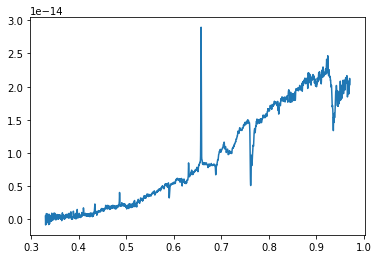

In [28]:
wavelength_dec02=np.append(Bwavelength_dec02,Rwavelength_dec02[13:])
data_dec02=np.append(Bdata_dec02,Rdata_dec02[13:])

fig,ax=plt.subplots()
ax.plot(wavelength_dec02,data_dec02)
plt.show()

# Optical 2008

In [29]:
wavelength2, data2, junk1, junk2 = np.loadtxt('../../DATA/AATau/Optical/aatau.dat', unpack=True,skiprows=9)
wavelength2=wavelength2/10000.0
wavelength3, data3, junk3, junk4 = np.loadtxt('../../DATA/AATau/Optical/aataublue.dat', unpack=True,skiprows=9)
wavelength3=wavelength3/10000.0
wavelength_2008=np.append(wavelength3[::-1],wavelength2)
data_2008=np.append(data3[::-1],data2)



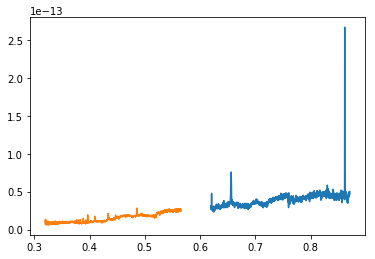

In [30]:
plt.plot(wavelength2,data2)
plt.plot(wavelength3,data3)

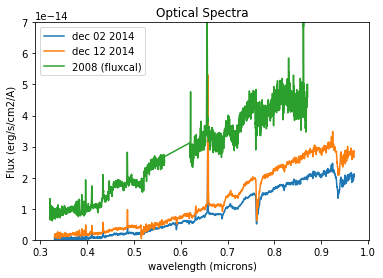

In [31]:
fig,ax=plt.subplots()
ax.plot(wavelength_dec02,data_dec02,label='dec 02 2014')
ax.plot(wavelength_dec12,data_dec12,label='dec 12 2014')
ax.plot(wavelength_2008,data_2008,label='2008 (fluxcal)')
ax.legend(loc='best')
ax.set_ylim(0,0.7E-13)
ax.set_xlabel("wavelength (microns)")
ax.set_ylabel("Flux (erg/s/cm2/A)")
ax.set_title("Optical Spectra")
plt.show()

Wavelength looks good, features in the same place.

# Infrared

-- 2014 --  
Dec 2:

merge.AA_Tau.3-10.fits  
merge.AA_Tau.28-31.fits  
merge.AA_Tau.84-87.fits  

Dec 12:

comb.AA_Tau.31-34.fits  
comb.AA_Tau.59-62.fits  
comb.AA_Tau.111-114.fits  

-- 2008 --  
final.AATau.31-34.fits

Kevin rewrote the files as AA_Tau.Dec2_2014.3-10.txt, etc:

In [32]:
IRwav2a, IRdata2a, junk= np.loadtxt('../../DATA/AATau/IR/AA_Tau.Dec2_2014.3-10.txt', unpack=True)
IRwav2b, IRdata2b, junk= np.loadtxt('../../DATA/AATau/IR/AA_Tau.Dec2_2014.28-31.txt', unpack=True)
IRwav2c, IRdata2c, junk= np.loadtxt('../../DATA/AATau/IR/AA_Tau.Dec2_2014.84-87.txt', unpack=True)
IRwav12a, IRdata12a, junk= np.loadtxt('../../DATA/AATau/IR/AA_Tau.Dec12_2014.31-34.txt', unpack=True)
IRwav12b, IRdata12b, junk= np.loadtxt('../../DATA/AATau/IR/AA_Tau.Dec12_2014.59-62.txt', unpack=True)
IRwav12c, IRdata12c, junk= np.loadtxt('../../DATA/AATau/IR/AA_Tau.Dec12_2014.111-114.txt', unpack=True)


hdulist = fits.open('../../DATA/AATau/IR/final.AATau.31-34.fits')
IRwavelength_2008=hdulist[0].data[0]
IRdata_2008=hdulist[0].data[1]
hdulist.close()


All IR wavelengths have a hitch around element 5000??

2a and 2c are 7099 elements, 2b is 7100 elements

12a is 7063, 12b is 7080, 12c is 7088

Bottom line is that they are all different!  But it doesn't matter, because Kevin took care of the nans in this new version.

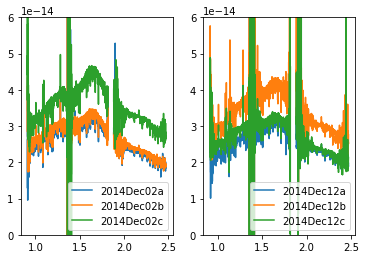

In [33]:
fig,[ax1,ax2]=plt.subplots(1,2)
ax1.plot(IRwav2a,IRdata2a,label='2014Dec02a')
ax1.plot(IRwav2b,IRdata2b,label='2014Dec02b')
ax1.plot(IRwav2c,IRdata2c,label='2014Dec02c')
ax2.plot(IRwav12a,IRdata12a,label='2014Dec12a')
ax2.plot(IRwav12b,IRdata12b,label='2014Dec12b')
ax2.plot(IRwav12c,IRdata12c,label='2014Dec12c')
ax1.legend(loc='best')
ax1.set_ylim(0,0.6e-13)
ax2.legend(loc='best')
ax2.set_ylim(0,0.6e-13)
plt.show()

Wavelength calibration looks good.  The third on Dec 2 and the second on Dec 12 do not look like the other two.  Why?

## Scaling IR and Optical

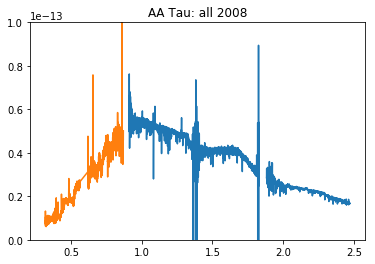

In [34]:
fig,ax=plt.subplots()
ax.plot(IRwavelength_2008,IRdata_2008)
ax.plot(wavelength_2008,data_2008)
ax.set_ylim(0,1E-13)
ax.set_title("AA Tau: all 2008")
plt.show()

The 2008 infrared matches reasonably with the 2008 optical, which is flux calibrated.  Therefore, don't do any scaling on the 2008.

There are three scaling tasks for the 2014 data: 
* scale the three infrared to match each other
* scale the infrared to the optical
* scale the overall 2014 spectrum by some unknown amount.  

Getting the opt-ir to fit for the 2014 is easy because they overlap:

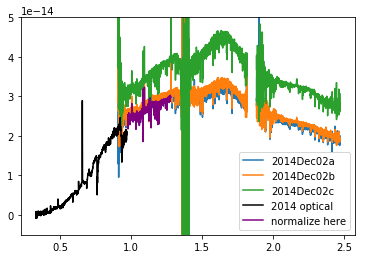

In [35]:
fig,ax=plt.subplots()
ax.plot(IRwav2a,IRdata2a,label='2014Dec02a')
ax.plot(IRwav2b,IRdata2b,label='2014Dec02b')
ax.plot(IRwav2c,IRdata2c,label='2014Dec02c')
ax.plot(wavelength_dec02,data_dec02,'k',label='2014 optical')
ax.plot(IRwav2a[500:2400],IRdata2a[500:2400],'purple',label='normalize here')
ax.legend(loc='best')
ax.set_ylim(-0.05E-13,0.5E-13)
plt.show()

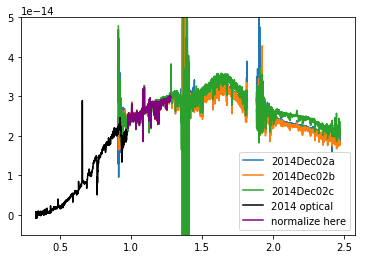

In [36]:
IRdata2b_scale=IRdata2b*np.mean(IRdata2a[500:2400])/np.mean(IRdata2b[500:2400])
IRdata2c_scale=IRdata2c*np.mean(IRdata2a[500:2400])/np.mean(IRdata2c[500:2400])

fig,ax=plt.subplots()
ax.plot(IRwav2a,IRdata2a,label='2014Dec02a')
ax.plot(IRwav2b,IRdata2b_scale,label='2014Dec02b')
ax.plot(IRwav2c,IRdata2c_scale,label='2014Dec02c')
ax.plot(wavelength_dec02,data_dec02,'k',label='2014 optical')
ax.plot(IRwav2a[500:2400],IRdata2a[500:2400],'purple',label='normalize here')
ax.legend(loc='best')
ax.set_ylim(-0.05E-13,0.5E-13)
plt.show()


Conclusion:  The third spectrum does not seem to go, because a simple scaling won't bring the long wavelength in line.  Keep the first two, scale to fit in the purple region, then average.

In [37]:
np.mean(IRdata2b[500:2400])/np.mean(IRdata2a[500:2400])


1.0521492864173225

In [38]:
IRwav2a[500],IRwav2a[2400],IRwav2b[500],IRwav2b[2400],IRwav2c[500],IRwav2c[2400]


(0.97825399999999996,
 1.2788299999999999,
 0.97810799999999998,
 1.2786500000000001,
 0.97825399999999996,
 1.2788299999999999)

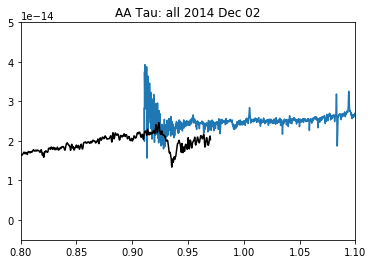

In [39]:
f_IRdat2b=interp.interp1d(IRwav2b,IRdata2b_scale)

IRwavelength_dec02=IRwav2a[:-5]
IRdata_dec02=(IRdata2a[:-5]+f_IRdat2b(IRwavelength_dec02))/2.0

fig,ax=plt.subplots()
ax.plot(IRwavelength_dec02,IRdata_dec02,label='2014Dec02')
ax.plot(wavelength_dec02,data_dec02,'k',label='2014 optical')
ax.set_ylim(-0.05E-13,0.5E-13)
ax.set_xlim(0.8,1.1)
ax.set_title("AA Tau: all 2014 Dec 02")
plt.show()


Not sure about the hitch in the long end of the optical... Match
the slope in 0.85 to 0.90 microns projected to the value at 0.945?  Yes, this works.

In [40]:
fitrange=np.logical_and(wavelength_dec02>0.85,wavelength_dec02<0.90)
m,b=np.polyfit(wavelength_dec02[fitrange],data_dec02[fitrange],1)
m*0.945+b

2.4121483272671047e-14

In [41]:
IRrange=np.logical_and(IRwavelength_dec02>0.94,IRwavelength_dec02<0.95)
np.average(IRdata_dec02[IRrange])

2.3951466319904803e-14

In [42]:
(m*0.945+b)/(np.average(IRdata_dec02[IRrange]))

1.0070983943319141

So, ~~multiply the IR~~ divide the optical by 1.0071

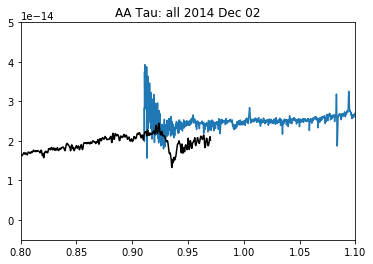

In [43]:

IRwavelength_dec02=IRwav2a[:-5]
IRdata_dec02=(IRdata2a[:-5]+f_IRdat2b(IRwavelength_dec02))/2.0
data_dec02scale=data_dec02/1.0071

fig,ax=plt.subplots()
ax.plot(IRwavelength_dec02,IRdata_dec02,label='2014Dec02')
ax.plot(wavelength_dec02,data_dec02scale,'k',label='2014 optical')
ax.set_ylim(-0.05E-13,0.5E-13)
ax.set_xlim(0.8,1.1)
ax.set_title("AA Tau: all 2014 Dec 02")
plt.show()


## Repeat for the other night

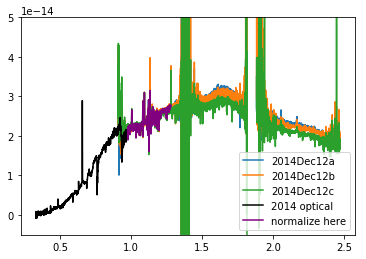

In [44]:
IRdata12b_scale=IRdata12b*np.mean(IRdata12a[500:2400])/np.mean(IRdata12b[500:2400])
IRdata12c_scale=IRdata12c*np.mean(IRdata12a[500:2400])/np.mean(IRdata12c[500:2400])

fig,ax=plt.subplots()
ax.plot(IRwav12a,IRdata12a,label='2014Dec12a')
ax.plot(IRwav12b,IRdata12b_scale,label='2014Dec12b')
ax.plot(IRwav12c,IRdata12c_scale,label='2014Dec12c')
ax.plot(wavelength_dec02,data_dec02,'k',label='2014 optical')
ax.plot(IRwav12a[500:2400],IRdata12a[500:2400],'purple',label='normalize here')
ax.legend(loc='best')
ax.set_ylim(-0.05E-13,0.5E-13)
plt.show()


These look better.

In [45]:
np.mean(IRdata12a[500:2400])/np.mean(IRdata12b[500:2400]),np.mean(IRdata12a[500:2400])/np.mean(IRdata12c[500:2400])

(0.74056871030755056, 0.88865807964761845)

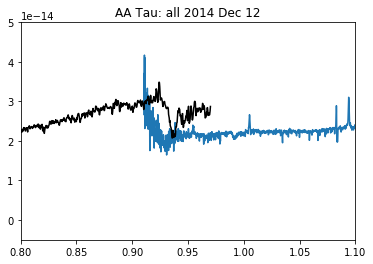

In [46]:
f_IRdat12b=interp.interp1d(IRwav12b,IRdata12b_scale)
f_IRdat12c=interp.interp1d(IRwav12c,IRdata12c_scale)

IRwavelength_dec12=IRwav12a
IRdata_dec12=(IRdata12a+f_IRdat12b(IRwavelength_dec12)+f_IRdat12b(IRwavelength_dec12))/3.0

fig,ax=plt.subplots()
ax.plot(IRwavelength_dec12,IRdata_dec12,label='2014Dec12')
ax.plot(wavelength_dec12,data_dec12,'k',label='2014 optical')
ax.set_ylim(-0.05E-13,0.5E-13)
ax.set_xlim(0.8,1.1)
ax.set_title("AA Tau: all 2014 Dec 12")
plt.show()


In [47]:
fitrange=np.logical_and(wavelength_dec12>0.85,wavelength_dec12<0.90)
m,b=np.polyfit(wavelength_dec12[fitrange],data_dec12[fitrange],1)
m*0.945+b

3.2446929564355093e-14

In [48]:
IRrange=np.logical_and(IRwavelength_dec12>0.94,IRwavelength_dec12<0.95)
np.average(IRdata_dec12[IRrange])
# IRdata_dec12[IRrange]

2.1326724253842081e-14

In [49]:
(m*0.945+b)/(np.average(IRdata_dec12[IRrange]))

1.52142116051928

So, ~~multiply the IR~~ divide the optical by 1.5214 (multiply by 0.657) to match. 

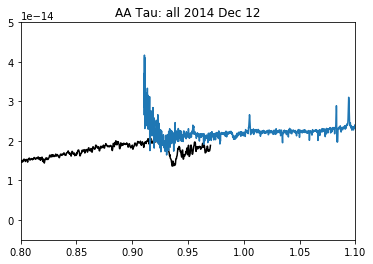

In [50]:
f_IRdat12b=interp.interp1d(IRwav12b,IRdata12b_scale)
f_IRdat12c=interp.interp1d(IRwav12c,IRdata12c_scale)

IRwavelength_dec12=IRwav12a
IRdata_dec12=(IRdata12a+f_IRdat12b(IRwavelength_dec12)+f_IRdat12b(IRwavelength_dec12))/3.0
data_dec12scale=data_dec12/1.5214

fig,ax=plt.subplots()
ax.plot(wavelength_dec12,data_dec12scale,'k',label='2014 optical')
ax.plot(IRwavelength_dec12,IRdata_dec12,label='2014Dec12')
ax.set_ylim(-0.05E-13,0.5E-13)
ax.set_xlim(0.8,1.1)
ax.set_title("AA Tau: all 2014 Dec 12")
plt.show()

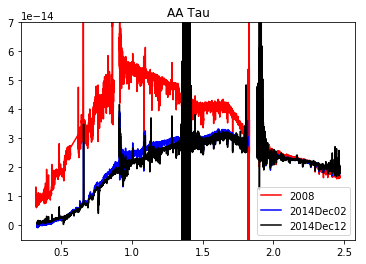

In [51]:
fig,ax=plt.subplots()
ax.plot(IRwavelength_2008,IRdata_2008,'r')
ax.plot(wavelength_2008,data_2008,'r',label='2008')
ax.plot(IRwavelength_dec02,IRdata_dec02,'b',label='2014Dec02')
ax.plot(wavelength_dec02,data_dec02scale,'b')
ax.plot(IRwavelength_dec12,IRdata_dec12,'k',label='2014Dec12')
ax.plot(wavelength_dec12,data_dec12scale,'k')
ax.legend(loc='best')
ax.set_title('AA Tau')
ax.set_ylim(-0.05E-13,0.7E-13)
plt.show()

To recap, there are three scaling tasks for the 2014 data: 
* ~~scale the three infrared to match each other~~
* ~~scale the infrared to the optical~~
* scale the overall 2014 spectrum by some unknown amount.  


### To do that, we need photometry.  To do photometry, we need units.

### Units:  1 erg/s = 1E-7 W, so 1 erg/s cm^2 = 1E-3 W/ m^2 and 1 erg/s cm^2 A = 10 W/ m^2 um

In [52]:
from astropy import units as u

In [53]:
IRdata_dec02u = IRdata_dec02    * u.erg / (u.s * u.cm * u.cm * u.AA)
IRdata_dec02u = IRdata_dec02    * u.erg / (u.s * u.cm * u.cm * u.AA)
IRdata_dec12u = IRdata_dec12    * u.erg / (u.s * u.cm * u.cm * u.AA)
IRdata_2008u  = IRdata_2008     * u.erg / (u.s * u.cm * u.cm * u.AA)
data_dec02u   = data_dec02scale * u.erg / (u.s * u.cm * u.cm * u.AA)
data_dec12u   = data_dec12scale * u.erg / (u.s * u.cm * u.cm * u.AA)
data_2008u    = data_2008       * u.erg / (u.s * u.cm * u.cm * u.AA)


In [54]:
IRwavelength_dec02u = IRwavelength_dec02 * u.micron
IRwavelength_dec12u = IRwavelength_dec12 * u.micron
IRwavelength_2008u  =  IRwavelength_2008 * u.micron
wavelength_dec02u   =   wavelength_dec02 * u.micron
wavelength_dec12u   =   wavelength_dec12 * u.micron
wavelength_2008u    =    wavelength_2008 * u.micron

# Use photometry to constrain the scaling:

Options:

A. Tie the whole scale to the AAVSO data:  V(2014) = 15.0

B. Use magnitudes from the literature:

> <em>X-ray to NIR emission from AA Tauri during the dim state - Occultation of the inner disk and gas-to-dust ratio of the absorber</em>

> P. C. Schneider, K. France, H. M. Günther, G. J. Herczeg, J. Robrade, J. Bouvier, M. McJunkin, J. H. M. M. Schmitt

> (Submitted on 16 Sep 2015)

These new observations happen just at the end of their plot, so 15.2 ish.  


C. **From Kevin: V = 12.73$\pm$0.35 in 2008 to V = 14.95$\pm$0.43 in 2014** (dated 2/22/18 from figure)

**So, accept all scaling that will yield between V = 14.52 and V = 15.38 in 2014.**

In [55]:
if platform=='win32':
    %run utils\getMag.py
else:  
    %run utils/getMag.py

No scaling:

In [56]:
getMag('V',wavelength_2008u,data_2008u)

<Quantity 12.916799666133551>

In [57]:
getMag('V',wavelength_dec02u,data_dec02u)

<Quantity 14.950513127491064>

In [58]:
getMag('V',wavelength_dec12u,data_dec12u)

<Quantity 15.039402873753904>

Hunt and peck scaling here: 

Now require each spectrum gets fainter in K?  Check Ks:

In [59]:
# mask out the NaNs:
def maskNans(wavelength,data):
    masked_data=data[np.logical_not(np.isnan(data))]
    masked_wavelength=wavelength[np.logical_not(np.isnan(data))]
    return (masked_wavelength,masked_data)

In [60]:
getMag('Ks',IRwavelength_2008u,IRdata_2008u)

<Quantity 8.181912300837219>

In [61]:
getMag('Ks',IRwavelength_dec02u,IRdata_dec02u)

<Quantity 8.199550241978315>

In [62]:
getMag('Ks',IRwavelength_dec12u,IRdata_dec12u)

<Quantity 8.200217882367372>

## Scaling, Revisited

Now use the Bouvier/Schneider photometry on google docs.  Consider everything at the fall 2011 campaign and more recent.

 | V | R | J | H | K
--- | --- | --- | --- | ---
min | 13.50 | 12.04 | 10.46 | 9.20 | 8.43
max | 16.49 | 14.83  | 11.13 | 10.13 | 9.70

In [63]:
test=np.array([])

for j in np.arange(0.2,2.0,.01):
    if 9.70 > getMag('Ks',IRwavelength_dec02u,IRdata_dec02u*j) > 8.43:
        test=np.append(test,j)
        
print,'min=',np.min(test),' max=',np.max(test)

(<function print>, 'min=', 0.26000000000000006, ' max=', 0.80000000000000049)

In [64]:
for j in np.arange(0.2,2.0,.01):
    if 10.13 > getMag('H',IRwavelength_dec02u,IRdata_dec02u*j) > 9.2:
        test=np.append(test,j)
        
print,'min=',np.min(test),' max=',np.max(test)

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(<function print>, 'min=', 0.26000000000000006, ' max=', 0.80000000000000049)

In [65]:
for j in np.arange(0.2,2.0,.01):
    if 11.13 > getMag('J',IRwavelength_dec02u,IRdata_dec02u*j) > 10.46:
        test=np.append(test,j)
  
print,'min=',np.min(test),' max=',np.max(test)

(<function print>, 'min=', 0.26000000000000006, ' max=', 0.80000000000000049)

These NIR magnitudes are very faint, and the optical magnitudes are over too large a range.  Look what scaling like this does to the optical mags:

In [66]:
getMag('V',wavelength_dec02u,data_dec02u*0.26),getMag('V',wavelength_dec02u,data_dec02u*0.80)

(<Quantity 16.41307979724502>, <Quantity 15.192788143157594>)

So, the V = 15.2 is just barely consistent with Kevin's read of the AAVSO data.  

My read of the AAVSO data is that V could be anywhere between 14.3 and 15.8:

In [67]:
test=np.array([])
for j in np.arange(0.2,2.0,.01):
    if 15.8 > getMag('V',wavelength_dec02u,data_dec02u*j) > 14.3:
        test=np.append(test,j)
print,'min=',np.min(test),' max=',np.max(test)

(<function print>, 'min=', 0.46000000000000024, ' max=', 1.8200000000000014)

The V=13.5 and V=19.5 from the google docs is just too big a range to be useful.

In [68]:
test=np.array([])
for j in np.arange(0.2,2.0,.01):
    if 14.83 > getMag('R',wavelength_dec02u,data_dec02u*j) > 12.04:
        test=np.append(test,j)
print,'min=',np.min(test),' max=',np.max(test)

(<function print>, 'min=', 0.3000000000000001, ' max=', 1.9900000000000015)

In [69]:
# Repeat for the other night:
test=np.array([])
for j in np.arange(0.2,2.0,.01):
    if 9.7 > getMag('Ks',IRwavelength_dec12u,IRdata_dec12u*j) > 8.43:
        test=np.append(test,j)
print,'min=',np.min(test),' max=',np.max(test)

(<function print>, 'min=', 0.26000000000000006, ' max=', 0.80000000000000049)

In [70]:
# Repeat for the other night:
test=np.array([])
for j in np.arange(0.2,2.0,.01):
    if 15.8 > getMag('V',wavelength_dec12u,data_dec12u*j) > 14.3:
        test=np.append(test,j)
print,'min=',np.min(test),' max=',np.max(test)

(<function print>, 'min=', 0.50000000000000022, ' max=', 1.9700000000000015)

Conclusion: Scale Dec02 by 0.46 -> 1.82 and Dec12 by 0.50 -> 1.97 based on AAVSO V only.

# Plot extinction curve:


In [71]:
allwav_2008,alldata_2008=np.append(wavelength_2008,IRwavelength_2008),np.append(data_2008,IRdata_2008)
allwav_dec02,alldata_dec02=np.append(wavelength_dec02,IRwavelength_dec02),np.append(data_dec02,IRdata_dec02)
allwav_dec12,alldata_dec12=np.append(wavelength_dec12,IRwavelength_dec12),np.append(data_dec12,IRdata_dec12)

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


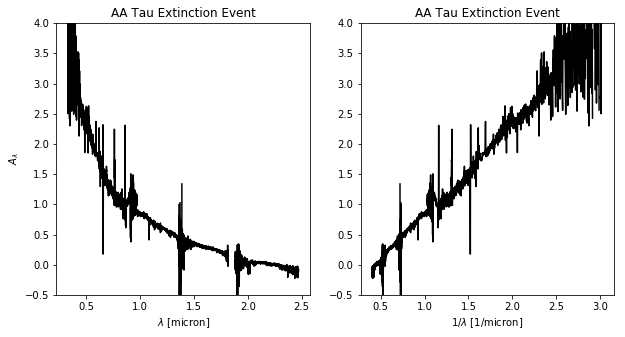

In [74]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)

ext_dec02=-2.5*np.log10(alldata_dec02/interp2008(allwav_dec02))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.plot(allwav_dec02,ext_dec02,'k')
ax2.plot(1./allwav_dec02,ext_dec02,'k')

ax1.set_xlabel('$\lambda$ [micron]')
ax2.set_xlabel('$1/\lambda$ [1/micron]')
ax1.set_ylabel('$A_\lambda$')

ax1.set_title('AA Tau Extinction Event')
ax2.set_title('AA Tau Extinction Event')
ax1.set_ylim(-0.5,4)
ax2.set_ylim(-0.5,4)
plt.show()

In [76]:
if platform=='win32':
    %run utils\getFMext
else:  
    %run utils/getFMext.py

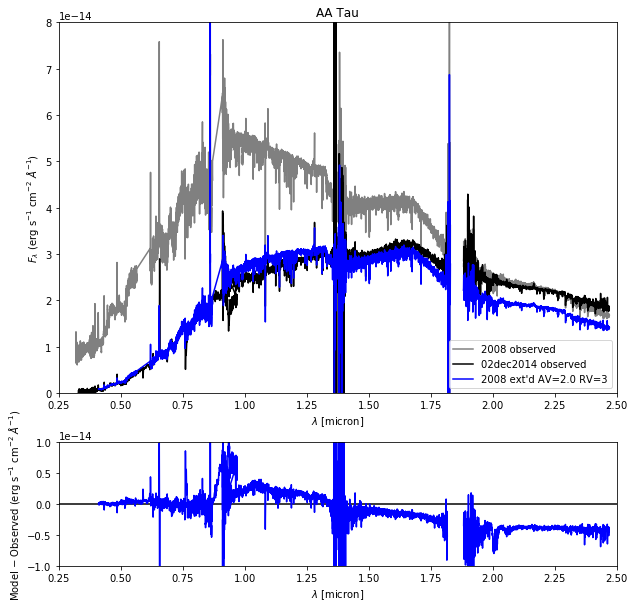

In [77]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),gridspec_kw = {'height_ratios':[3, 1]})

# fig.subplots_adjust(hspace=0)

# my little FMunred doesn't include UV, lambda < 0.411 micron

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_dec02,alldata_dec02,'k',label='02dec2014 observed')
ax1.plot(allwav_2008[allwav_2008>0.411],alldata_2008[allwav_2008>0.411]*
        10.0**(-0.4*2.0*getFMext(allwav_2008[allwav_2008>0.411],3.0,'fmunred')/3.0),'blue',label="2008 ext'd AV=2.0 RV=3")
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax1.legend(loc='best')
ax1.set_title('AA Tau')

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec02[allwav_dec02>0.411],
         interp2008(allwav_dec02[allwav_dec02>0.411])*10.0**(-0.4*2.0*getFMext(allwav_dec02[allwav_dec02>0.411],3.0,'fmunred')/3.0)
         -alldata_dec02[allwav_dec02>0.411],'blue',label='Extinction only')
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Model $-$ Observed (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')

plt.show()

## Fit to NIR extinction curve:

Quick-and-dirty remove the telluric lines:

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


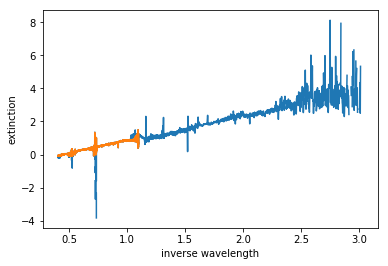

In [78]:
IRext_dec02=-2.5*np.log10(IRdata_dec02/interp2008(IRwavelength_dec02))

notel_ext=IRext_dec02[IRext_dec02 > -0.1]
notel_wav=IRwavelength_dec02[IRext_dec02 > -0.1]

fig,ax=plt.subplots(1,1)
ax.plot(1/allwav_dec02,ext_dec02)
ax.plot(1/notel_wav,notel_ext)
ax.set_xlabel('inverse wavelength')
ax.set_ylabel('extinction')
fig.show()

$A_\lambda/A_V$ from the literature:

FM_unred (F99) = cubic spline, explicitly $R_V$ independent 

FM07 $= (0.63 - 0.84/R_V)\lambda^{-1.84}$

FM09 $= (0.349/R_V + 2.087) / (1 + (\lambda/0.507)^\alpha)$, where $\alpha$ is in the range from 1.5 to 3.0

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


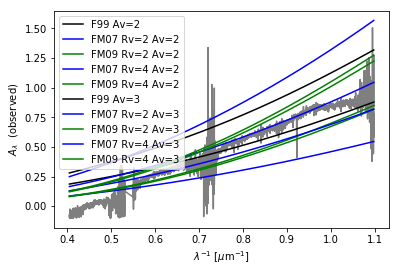

In [79]:
fig,ax=plt.subplots(1,1)
ax.plot(1/notel_wav,notel_ext,'black',alpha=0.5)

for Av in [2,3]:
    ax.plot(1/notel_wav,Av*getFMext(notel_wav,3.0,'fmunred')/3.0,'black',label='F99 Av='+str(Av))
    for Rv in [2,4]:
        ax.plot(1/notel_wav,Av*(0.65-0.84/Rv)*notel_wav**-1.84,'blue',label='FM07 Rv='+str(Rv)+' Av='+str(Av))
        ax.plot(1/notel_wav,Av*(0.349/Rv+2.087)/(1+(notel_wav/0.507)**2.5),'green',label='FM09 Rv='+str(Rv)+' Av='+str(Av))
    
ax.set_xlabel('$\lambda^{-1}$ [$\mu$m$^{-1}$]')
ax.set_ylabel('$A_\lambda$  (observed)')
ax.legend(loc='best')
fig.show()

Obviously, there is a lot going on there.

Yes, we still have the empirical AA Tau extinction curve, but all models will be normalized to some band, and usually the V band.  The better thing to do is fit the curve

First, find the observed Av:

In [80]:
Av=getMag('V',wavelength_dec02u,data_dec02u)-getMag('V',wavelength_2008u,data_2008u)
Av

<Quantity 2.0337134613575127>

**Option A:** Fit a line to $E(\lambda-V) = A_\lambda - A_V$

In [81]:
fita,fitb=np.polyfit(1/notel_wav,notel_ext-Av,1)
fita,fitb,fita/fitb

(1.5358894763653466, -2.724492963250893, -0.56373405880729732)


So, $E(\lambda-V)=A_\lambda-A_V=1.54\lambda^{-1} - 2.72$.

This isn't internally consistent, however, because Av (2.03) should equal the intercept (2.72), and it doesn't.

What it implies is a NIR extinction curve of $A_\lambda/A_V = 0.56\lambda^{-1}$ normalized to the visible... as far as that goes.

**Option B:** Fit the offset power law to $E(\lambda-V)$

In [82]:
from scipy.optimize import curve_fit

In [83]:
def offpowlaw(x, a, b, c):
    return a * (x**b) + c

In [84]:
cfit2,cerr2=curve_fit(offpowlaw,1/notel_wav,notel_ext-Av)
cfit2,cerr2,cfit2[0]/cfit2[2]

(array([ 1.9589694 ,  0.70799585, -3.15834132]),
 array([[ 0.00124067, -0.00059367, -0.00125972],
        [-0.00059367,  0.00028835,  0.00060499],
        [-0.00125972,  0.00060499,  0.00128066]]),
 -0.62025259493069096)

This says that $E(\lambda-V) = 1.95 \lambda^{-0.71} - 3.16 = 3.16 \left(0.62\lambda^{-0.71}-1\right)$, which maybe makes a some sense, but still the intercept is not equal to what we actually measure (and use to calculate the input to the fit!) for $A_V$.

**Option C:** Try fitting the FM07 and FM09 curve (which fits from the J band to the I band) to the $A_\lambda$ curve.

In [85]:
def FM07(x, a, b):
    # x is wavelength, a is Av, b is Rv
    return a*(0.63 - 0.84/b)*x**-1.84

In [86]:
cfit3,cerr3=curve_fit(FM07,notel_wav,notel_ext)
cfit3,cerr3

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([-4.5339997 ,  1.04890353]), array([[ inf,  inf],
        [ inf,  inf]]))

Obviously ridiculous. It didn't even remotely converge.  Why?

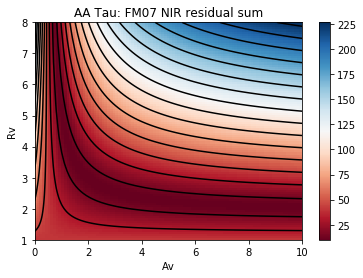

In [87]:
a = np.linspace(0,10,100)
b = np.linspace(1,8,100)
x,y = np.meshgrid(a, b)
z = FM07(1,x,y) # initialize

for i in range(100):
    for j in range(100):
        z[i,j]=np.sqrt(np.sum((notel_ext-FM07(notel_wav,a[i],b[j]))**2.0))


plt.pcolor(x,y,z,cmap='RdBu')
plt.colorbar()
plt.contour(x,y,z,20,colors='k')
plt.xlabel('Av')
plt.ylabel('Rv')
plt.title('AA Tau: FM07 NIR residual sum')


In [88]:
def FM09(x, a, b, c):
    # x is wavelength, A is Av, b is Rv, c is alpha
    return a*(0.349/b + 2.087)/(1 + (x/0.507)**c)

In [89]:
cfit4,cerr4=curve_fit(FM07,notel_wav,notel_ext)
cfit4,cerr4

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([-4.5339997 ,  1.04890353]), array([[ inf,  inf],
        [ inf,  inf]]))

Negative extinction, and again, not a converged fit.

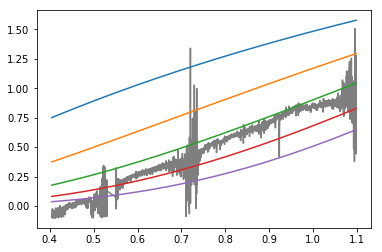

In [90]:
plt.plot(1/notel_wav,notel_ext,'black',alpha=0.5)
for alpha in [1,1.5,2,2.5,3]:
    plt.plot(1/notel_wav,FM09(notel_wav,2.0,3.0,alpha))

There is something strange about the FM09 function.  Changing alpha should not change the overall extinction this much!

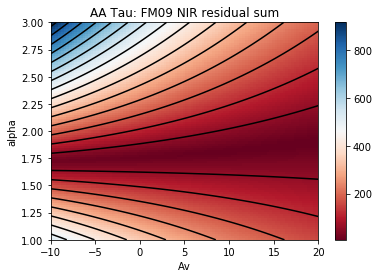

In [91]:
a = np.linspace(-10,20,100)
b = np.linspace(1,3,100)
x,y = np.meshgrid(a, b)
z = FM09(1,x,3.0,y) # initialize

for i in range(100):
    for j in range(100):
        z[i,j]=np.sqrt(np.sum((notel_ext-FM09(notel_wav,a[i],3.0,b[j]))**2.0))


plt.pcolor(x,y,z,cmap='RdBu')
plt.colorbar()
plt.contour(x,y,z,15,colors='k')
plt.xlabel('Av')
plt.ylabel('alpha')
plt.title('AA Tau: FM09 NIR residual sum')


**Option D:**  Fit just the power law part with a free exponent to $A_\lambda$. 

In [92]:
def powlaw(x, a, b):
    return a * (x**b)

In [93]:
cfit,cerr=curve_fit(powlaw,1/notel_wav,notel_ext)
cfit,cerr

(array([ 0.85431376,  2.55211851]),
 array([[  5.12679866e-06,   1.40977710e-05],
        [  1.40977710e-05,   1.73018517e-04]]))

This says that $A_\lambda=0.85 \lambda^{-2.55}$, which makes little sense as an extinction law.  Note that we removed $A_V$ as a free parameter.

**This is the way to go!  No muss, no fuss.**

In [94]:
cfit[0]/Av

<Quantity 0.4200757751877824>

With the $A_V$ that we measure, $A_\lambda/A_V=0.42\lambda^{-2.55}$.

So we plot them:

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


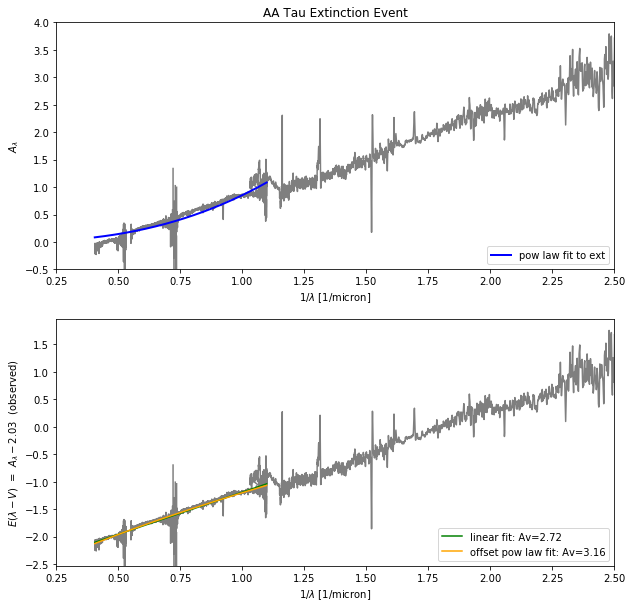

In [95]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))


ax1.plot(1./allwav_dec02,ext_dec02,'k',alpha=0.5)
# ax1.plot(1/notel_wav,notel_ext,'black',alpha=0.5)
ax1.plot(1/notel_wav,cfit[0]/notel_wav**cfit[1],'blue',label='pow law fit to ext',linewidth=2)
ax1.set_xlabel('$1/\lambda$ [1/micron]')
ax1.set_ylabel('$A_\lambda$')
ax1.set_title('AA Tau Extinction Event')
ax1.set_ylim(-0.5,4)
ax1.set_xlim(0.25,2.5)
ax1.legend(loc='best')

ax2.plot(1./allwav_dec02,ext_dec02-Av,'k',alpha=0.5)
# ax2.plot(1/notel_wav,notel_ext-Av,'black',alpha=0.5)
ax2.plot(1/notel_wav,fita/notel_wav+fitb,'green',label='linear fit: Av='+str(np.round(-fitb,2)))
ax2.plot(1/notel_wav,cfit2[0]/notel_wav**cfit2[1]+cfit2[2],'orange',label='offset pow law fit: Av='+str(np.round(-cfit2[2],2)))
ax2.set_xlabel('$1/\lambda$ [1/micron]')
ax2.set_ylabel('$E(\lambda - V)$  =  $A_\lambda - $'+str(np.round(Av,2))+'  (observed)')
ax2.set_ylim(-0.5-Av,4-Av)
ax2.set_xlim(0.25,2.5)
ax2.legend(loc='best')

fig.show()

## Grey extinction?

Grey extinction does not help in the extinction event of AA Tau because there is almost no extinction at K, too little in fact to yield a good fit.

But, what if the AA Tau lost some grey extinction that was present before the extinction event?  This would be the equivalent of shifting the whole extinction curve upward by the amount of that grey extinction.  In other words, the star was brighter behind the now-missing grey extinction.

So we fit an offset power law not the the reddening, as before, but to the extinction.

In [96]:
cfit10,cerr10=curve_fit(offpowlaw,1/notel_wav,notel_ext)
cfit10,cerr10

(array([ 1.95896939,  0.70799586, -1.12462785]),
 array([[ 0.00124067, -0.00059367, -0.00125972],
        [-0.00059367,  0.00028835,  0.00060499],
        [-0.00125972,  0.00060499,  0.00128066]]))

So, $A_\lambda = 1.96\lambda^{-0.71}$ and $A_{\rm grey}=1.12$.  Notice that this did nothing to help the shape of the curve.

C:\Users\larsonk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


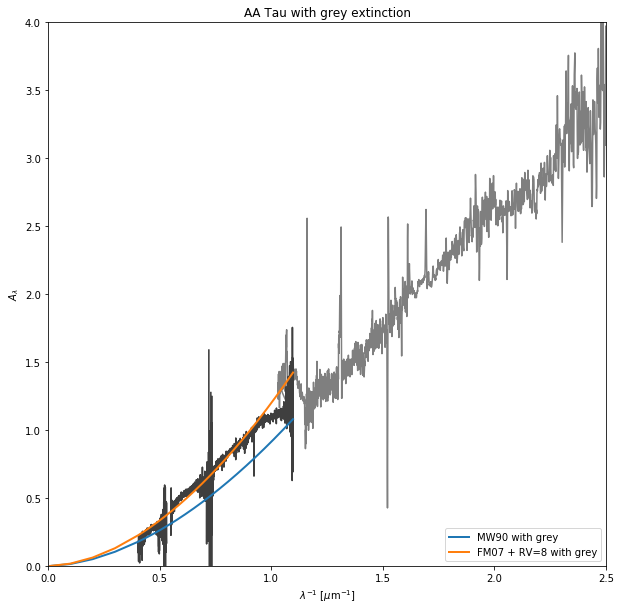

In [122]:
fig,ax1=plt.subplots(1,1,figsize=(10,10))

Agrey=0.25

y=IRext_dec02
x=IRwavelength_dec02

fill=1/np.array([0.3,.2,.1,.01])

ax1.plot(1/x,y+Agrey,'black',alpha=0.5)
ax1.plot(1/allwav_dec02,ext_dec02+Agrey,'black',alpha=0.5)
ax1.plot(np.append(1/x,1/fill),powlaw(np.append(x,fill),(Av+Agrey)*0.4,-1.8),label='MW90 with grey',linewidth=2)
ax1.plot(np.append(1/x,1/fill),FM07(np.append(x,fill),(Av+Agrey),8),label='FM07 + RV=8 with grey',linewidth=2)

ax1.set_xlabel('$\lambda^{-1}$ [$\mu$m$^{-1}$]')
ax1.set_ylabel('$A_\lambda$')
# ax1.title('test')
ax1.legend(loc='best')
ax1.set_title('AA Tau with grey extinction')
ax1.set_ylim(0,4)
ax1.set_xlim(0,2.5)
fig.show()

# Write data... out of date

In [ ]:
# writeout=np.array([IRwavelength_2008,IRdata_2008])
# np.savetxt("AATau_IR2008.txt",np.transpose(writeout),fmt="%.6e")

# writeout=np.array([wavelength_2008,data_2008])
# np.savetxt("AATau_opt2008.txt",np.transpose(writeout),fmt="%.6e")

# writeout=np.array([IRwavelength_dec02,IRdata_dec02*all_scale02])
# np.savetxt("AATau_IR2014dec02.txt",np.transpose(writeout),fmt="%.6e")

# writeout=np.array([wavelength_dec02,data_dec02*all_scale02])
# np.savetxt("AATau_opt2014dec02.txt",np.transpose(writeout),fmt="%.6e")

# writeout=np.array([IRwavelength_dec12,IRdata_dec12*all_scale12])
# np.savetxt("AATau_IR2014dec12.txt",np.transpose(writeout),fmt="%.6e")

# writeout=np.array([wavelength_dec12,data_dec12*all_scale12])
# np.savetxt("AATau_opt2014dec12.txt",np.transpose(writeout),fmt="%.6e")
